# Applied Data Analysis: Movies
This project analyzes the key factors influencing box-office success for films released between 1915 and 2015, seeking to understand how audience preferences and industry trends have evolved over time.

We will work with three datasets:
- CMU Movie Summary
- IMDb dataset
- CPI (Consumer Price Index of US Bureau of Labor Statistics)

## Loading the Datasets

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
import os
import sys

from importlib import reload
import src.utils.utils
reload(src.utils.utils)
from src.utils.utils import top_n_by_interval, top_n_total_revenue, top_n_average_rating

In [4]:
data_folder = './data/'
pickle_folder = data_folder + 'pickle/'
imdb_folder = data_folder + 'IMDB/'
cmu_folder = data_folder + 'CMU/'

In [15]:
## Load the data

with open(pickle_folder + 'movies_clean.p', 'rb') as f:
    movie_data = pickle.load(f)

with open(pickle_folder + 'characters_clean.p', 'rb') as f:
    character_data = pickle.load(f)

In [16]:
movie_data

,Wikipedia_movie_ID,Movie_name,Movie_box_office_revenue,Year,Year_Interval,nb_of_Genres,Genre_Action,Genre_Action/Adventure,Genre_Adventure,Genre_Animation,...,Country_Germany,Country_Hong Kong,Country_India,Country_Italy,Country_Japan,Country_Other,Country_United Kingdom,Country_United States of America,averageRating,numVotes
0,3217,Army of Darkness,21502796.0,1992,1975-1995,12,True,True,False,False,...,False,False,False,False,False,False,False,True,7.4,197717.0
1,3333,The Birth of a Nation,50000000.0,1915,1915-1935,7,False,False,False,False,...,False,False,False,False,False,False,False,True,6.1,26681.0
2,3746,Blade Runner,33139618.0,1982,1975-1995,12,False,False,False,False,...,False,True,False,False,False,False,False,True,8.1,835060.0
3,3837,Blazing Saddles,119500000.0,1974,1955-1975,3,False,False,False,False,...,False,False,False,False,False,False,False,True,7.7,155432.0
4,3947,Blue Velvet,8551228.0,1986,1975-1995,3,False,False,False,False,...,False,False,False,False,False,False,False,True,7.7,219742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34784,36674310,Mystery of Marie Roget,NaN,1942,1935-1955,1,False,False,False,False,...,False,False,False,False,False,False,False,True,5.9,371.0
34785,36683360,2016: Obama's America,33449086.0,2012,1995-2015,1,False,False,False,False,...,False,False,False,False,False,False,False,True,4.8,11049.0
34786,36814246,Eraserhead,7000000.0,1977,1975-1995,10,False,False,False,False,...,False,False,False,False,False,False,False,True,7.3,130107.0
34788,36929245,Before Midnight,NaN,2013,1995-2015,2,False,False,False,False,...,False,False,False,False,False,False,False,True,7.9,175072.0


In [17]:
character_data

,Wikipedia_movie_ID,Movie_release_date,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season,Year_of_birth,Age_Interval
0,975900,2001-08-24,1958-08-26,F,Wanda De Jesus,43,Ghosts of Mars,14010832.0,2001,1995-2015,4.9,58585.0,Summer,1958,Experimented Actor(30-60)
1,975900,2001-08-24,1974-08-15,F,Natasha Henstridge,27,Ghosts of Mars,14010832.0,2001,1995-2015,4.9,58585.0,Summer,1974,Young Actor(19-30)
2,975900,2001-08-24,1969-06-15,M,Ice Cube,32,Ghosts of Mars,14010832.0,2001,1995-2015,4.9,58585.0,Summer,1969,Experimented Actor(30-60)
3,975900,2001-08-24,1967-09-12,M,Jason Statham,34,Ghosts of Mars,14010832.0,2001,1995-2015,4.9,58585.0,Summer,1967,Experimented Actor(30-60)
4,975900,2001-08-24,1977-09-25,F,Clea DuVall,24,Ghosts of Mars,14010832.0,2001,1995-2015,4.9,58585.0,Summer,1977,Young Actor(19-30)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165647,30553937,1998-03-07,1970-06-22,M,Michael Trucco,28,Confessions of a Sexist Pig,NaN,1998,1995-2015,4.9,534.0,Spring,1970,Young Actor(19-30)
165648,30553937,1998-03-07,1948-10-05,M,Sal Viscuso,50,Confessions of a Sexist Pig,NaN,1998,1995-2015,4.9,534.0,Spring,1948,Experimented Actor(30-60)
165649,30553937,1998-03-07,1965-11-16,F,Anneliza Scott,33,Confessions of a Sexist Pig,NaN,1998,1995-2015,4.9,534.0,Spring,1965,Experimented Actor(30-60)
165650,30553937,1998-03-07,1959-04-02,M,Steve Monarque,39,Confessions of a Sexist Pig,NaN,1998,1995-2015,4.9,534.0,Spring,1959,Experimented Actor(30-60)


# Data Analysis

In this notebbok, we perform an exploratory data analysis. We focus on a variety of characteristics - such as genre, release time, translations, and lead actors' age and gender - to determine their impact on a film's revenue. By examining five historical periods, we trace how these factors’ influence on box-office success has evolved, reflecting broader societal, political, and historical changes.

## 1. Analysis per Year

We start by analyzing the number of films and box-office revenues over the entire study period to understand how the role of movie productions has evolved over time.

### 1.1  Number of movies per Year

Firstly, we can observe that the number of movies has increased over the years,suggesting a growth of film production worldwide.

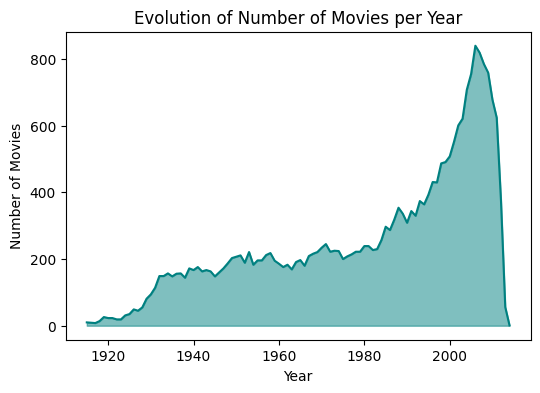

In [18]:
md_number = movie_data.copy()
movies_per_year = md_number['Year'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.plot(movies_per_year.index, movies_per_year.values, linestyle='-', color='teal')
plt.fill_between(movies_per_year.index, movies_per_year.values, color='teal', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Evolution of Number of Movies per Year")
plt.show()

### 1.2 Box Office Revenue per Year

In this section, the plot shows the evolution of mean box office revenue over the years. The black line represents the mean revenue over time, while the shaded blue area indicates the variability or spread around this mean. 

Initially, from 1915 to around 1950, box office revenue remains relatively low and stable. Starting in the 1950s, however, we observe a gradual upward trend, reflecting increased box office revenue, likely driven by the growing popularity of cinema, advancements in film production, and the post-war economic boom. 

From the 1970s onward, the revenue shows more pronounced growth, with increased variability. Indeed, this period corresponds to changes in distribution methods and the impact of global markets. The trend indicates that while the film industry has become more profitable over time, it has also become more volatile, suggesting some films achieving massive box office success while others underperform.

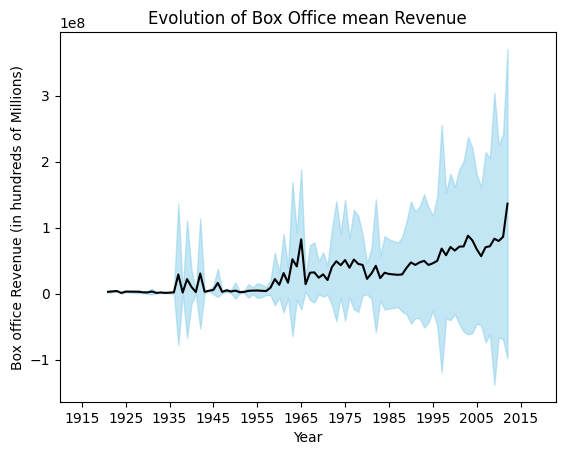

In [19]:
## Calculate the average and standard deviation of the box office revenue per year
stats_per_year = md_number.groupby(by='Year')['Movie_box_office_revenue'].agg(
    average='mean',
    std_dev='std'
).dropna()

ax = stats_per_year.average.plot(xlim=(1910,2023),xticks=range(1895,2023,10),title='Evolution of Box Office mean Revenue',ylabel='Box office Revenue (in hundreds of Millions)',color='black')
plt.fill_between(stats_per_year.index, stats_per_year.average - stats_per_year.std_dev,
                 stats_per_year.average + stats_per_year.std_dev, alpha = 0.5, color = 'skyblue')

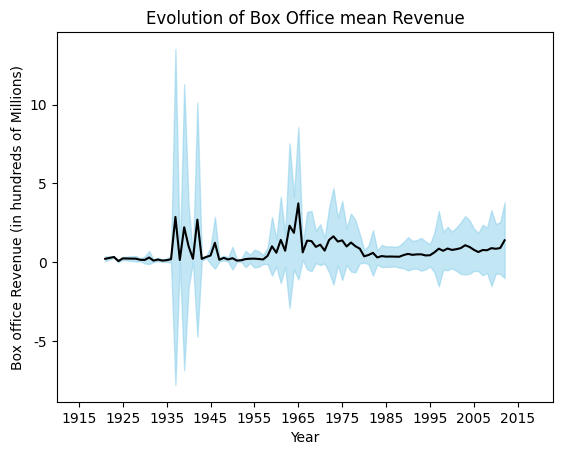

In [20]:
from matplotlib.ticker import FuncFormatter
df_mod_clean = md_number.dropna(subset='Movie_box_office_revenue')
cpi = pd.read_csv("./data/CPI.csv")

cpi = pd.DataFrame(cpi.groupby('year').apply(lambda x: x['value'].mean(),include_groups=False),columns=['cpi'])
base_cpi = cpi.loc[2015].values[0]

df_mod_cpi = df_mod_clean.merge(cpi,left_on='Year',right_on='year',how='left')
df_mod_cpi['Adjusted_Revenue'] = df_mod_cpi['Movie_box_office_revenue']*(base_cpi/df_mod_cpi['cpi'])

stats_per_year = df_mod_cpi.groupby(by='Year')['Adjusted_Revenue'].agg(
    average='mean',
    std_dev='std'
).dropna()

ax = stats_per_year.average.plot(xlim=(1910,2023),xticks=range(1895,2023,10),title='Evolution of Box Office mean Revenue',ylabel='Box office Revenue (in hundreds of Millions)',color='black')
plt.fill_between(stats_per_year.index, stats_per_year.average - stats_per_year.std_dev,
                 stats_per_year.average + stats_per_year.std_dev, alpha = 0.5, color = 'skyblue')
formatter = FuncFormatter(lambda x, _: f'{x / 1e8:.0f}')
ax.yaxis.set_major_formatter(formatter)

## 2. Analysis per Country

In this section, we analyze the number of movies, box-office revenues, and film ratings by country to understand cultural preferences, evaluate the impact of international markets, detect success disparities, observe the evolution of the global film industry, and identify the factors that contribute to a film's success.

In [21]:
with open(pickle_folder + 'movies_countries_exploded.p', 'rb') as f:
    md_countries = pickle.load(f)

### 2.1 Number of Movies per Country

The United States of America leads by a significant margin, with over 30,000 movies, far surpassing other countries. India follows, but with much lower numbers, while the United Kingdom, France, and Italy are also prominent.

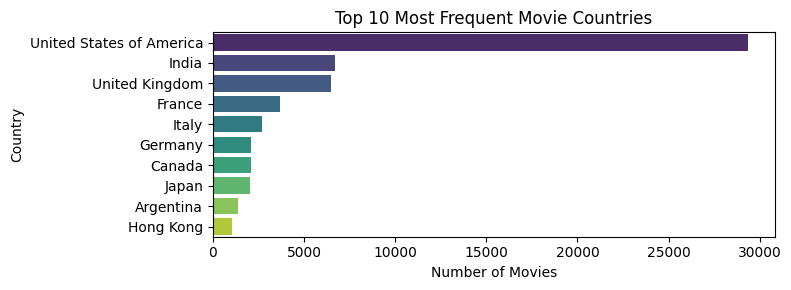

In [22]:
top_countries = md_countries.value_counts('Countries').head(10)

plt.figure(figsize=(8, 3))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis",hue=top_countries.index)
plt.title('Top 10 Most Frequent Movie Countries')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Additionally, we analyze the 10 most frequent countries in film production over a 20-year interval:

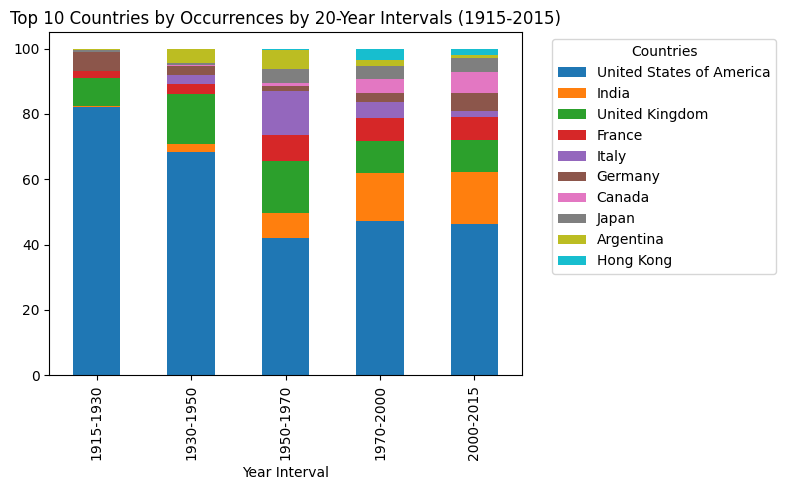

In [23]:
ax = top_n_by_interval('Countries',md_countries)

### 2.2 Box Office Revenue and Average Rating per Country

The figure below contains two bar plots: 
- Left Plot (Average IMDb Rating by Country): This plot shows the top 10 countries by average IMDb rating.
- Right Plot (Average Box Office Revenue by Country): This plot shows the top 10 countries by average box office revenue, displayed on a logarithmic scale.

Interestingly, major film-producing countries, like the United States or India, are not present in this top 10 list for box office revenue, while countries like New Zealand, Czech Republic, and the United Arab Emirates appear.

Some factors could explain why some lesser-known film-producing countries appear at the top for average IMDb ratings or box office revenue, rather than countries with traditionally large film industries:
- Small Sample Size: Countries with fewer film productions might have a few well-rated or high-revenue films that skew the averages.
- High-Profile Productions: Some of these countries may not have large film industries, but they could have hosted high-budget international productions that brought in significant revenue or received favorable ratings.
- Cultural Biases in Ratings: IMDb ratings are user-generated, which can introduce cultural biases.

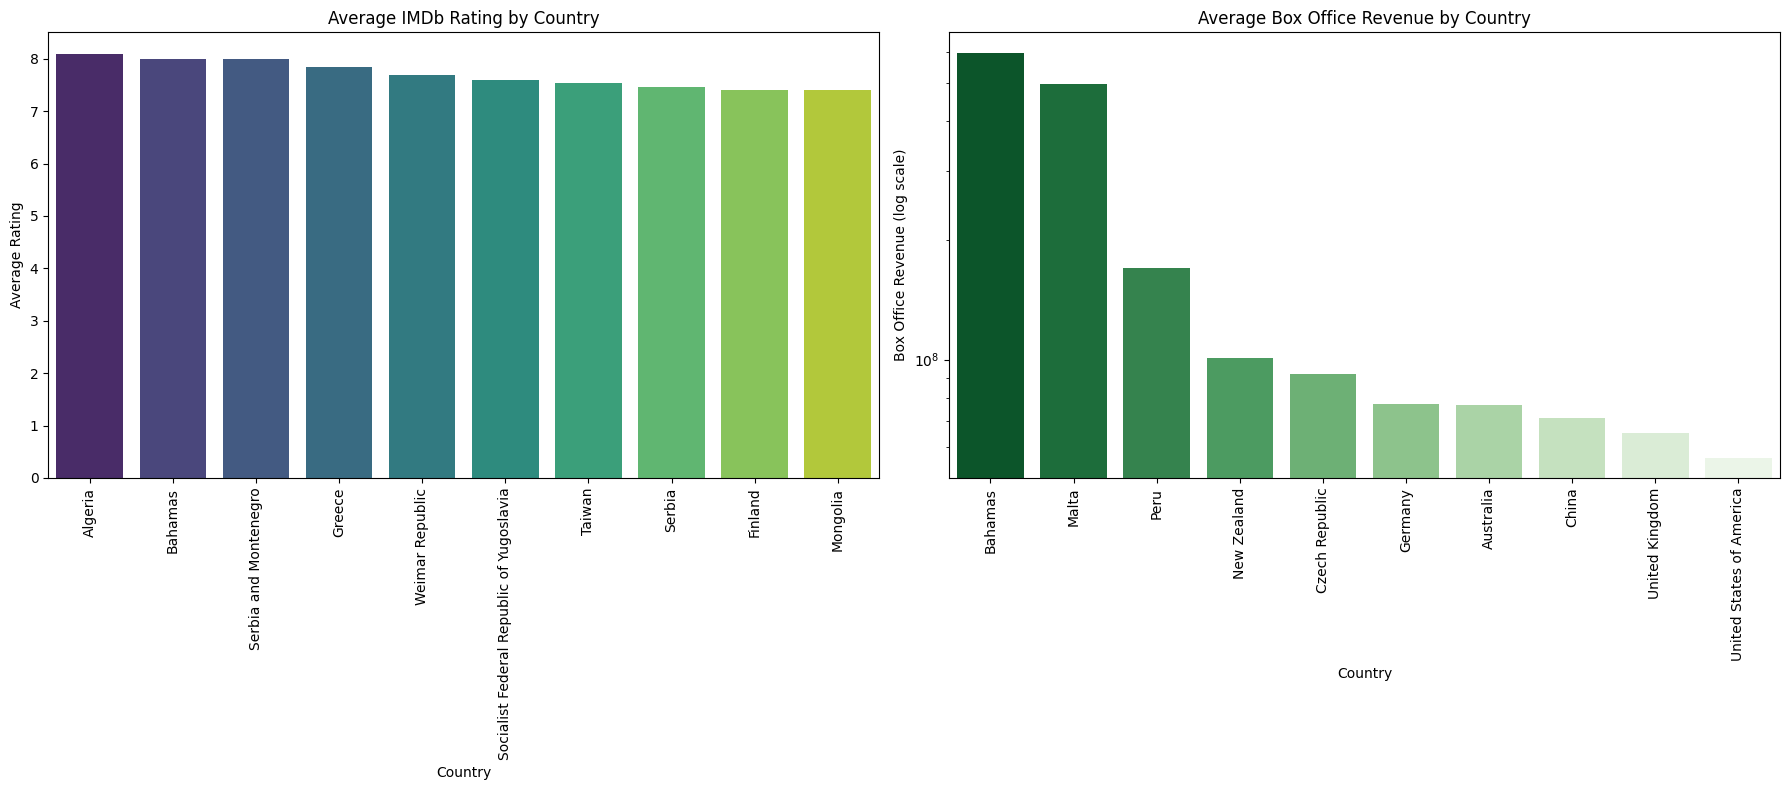

In [24]:
md_countries = md_countries.dropna(subset=['Movie_box_office_revenue'])
md_countries = pd.merge(md_countries,movie_data[['Wikipedia_movie_ID','averageRating','numVotes']],on='Wikipedia_movie_ID')

country_revenue = md_countries.groupby('Countries').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
})

# Plot 
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
country_revenue = country_revenue.sort_values(by='averageRating', ascending=False)

# Average imdb rating by Language
sns.barplot(x=country_revenue.head(10).index, y=country_revenue.head(10)['averageRating'], ax=axs[0], palette='viridis', hue=country_revenue.head(10).index)    
axs[0].set_title('Average IMDb Rating by Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Average Rating')
axs[0].tick_params(axis='x', rotation=90)  

country_revenue = country_revenue.sort_values(by='Movie_box_office_revenue', ascending=False).head(10)

# Average box office revenue by Language
sns.barplot(x=country_revenue.head(10).index, y=country_revenue.head(10)['Movie_box_office_revenue'], ax=axs[1], palette='Greens_r', hue=country_revenue.head(10).index)
axs[1].set_title('Average Box Office Revenue by Country')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Box Office Revenue (log scale)')
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=90)  
plt.tight_layout()
plt.show()

## 3 Analysis per Genre

In this third part, we delve into the analysis of movies based on their genres. We start by examining the number of movies produced per genre, identifying the most popular genres over time. This is followed by an analysis of the box office revenue and average ratings for each genre, providing insights into the financial success and audience reception of different types of films. By exploring these aspects, we aim to uncover trends and patterns in genre popularity and success, offering a comprehensive understanding of how genre influences the film industry.

In [12]:
with open(pickle_folder + 'movies_genres_exploded.p', 'rb') as f:
    md_Genres = pickle.load(f)

### 3.1 Number of Movies per Genre

The plot of the number of movies per genre highlights that drama, comedy, and romance have a strong foothold in the film industry, while there is also significant production across other genres to meet different audience preferences.

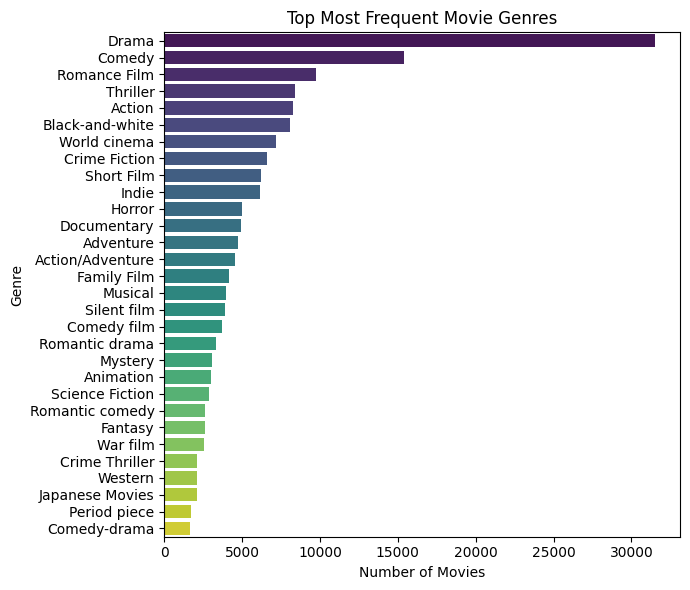

In [13]:
# Select the top 30 genres
top_genres = md_Genres.value_counts('Genres').head(30)

plt.figure(figsize=(7, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis",hue=top_genres.index)
plt.title('Top Most Frequent Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Analyzing the 10 most frequent Genres in Intervals of 20 Years, we observe that "Drama" has consistently been the dominant genre across all intervals, indicating a stable audience preference for dramatic storytelling over the years. "Comedy" and "Romance Film" also feature prominently in each interval, highlighting their long-standing popularity. However, there are noticeable shifts in other genres; for example, "Black-and-white" films were more common in the earlier intervals (1915-1935 and 1935-1955) but diminish in later years, reflecting the evolution of film technology and color becoming the standard. The presence of genres like "Thriller," "Action," and "World Cinema" increases in the latter half of the 20th century, likely due to globalization and the rise of more diverse storytelling.

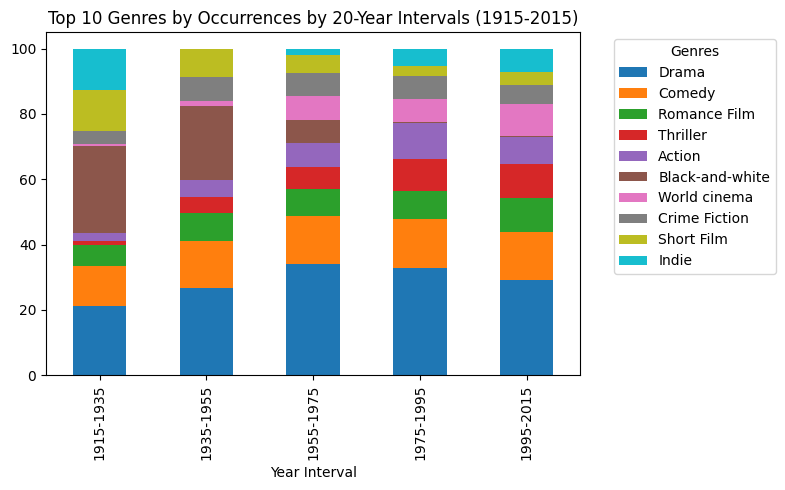

In [14]:
ax = top_n_by_interval('Genres',md_Genres)

### 3.2 Box Office Revenue and Average Rating per Genre

Additionally, we analyze the box office revenue and average IMDb ratings for different movie genres to discover insights into the relationship between them, helping us identify trends and patterns.

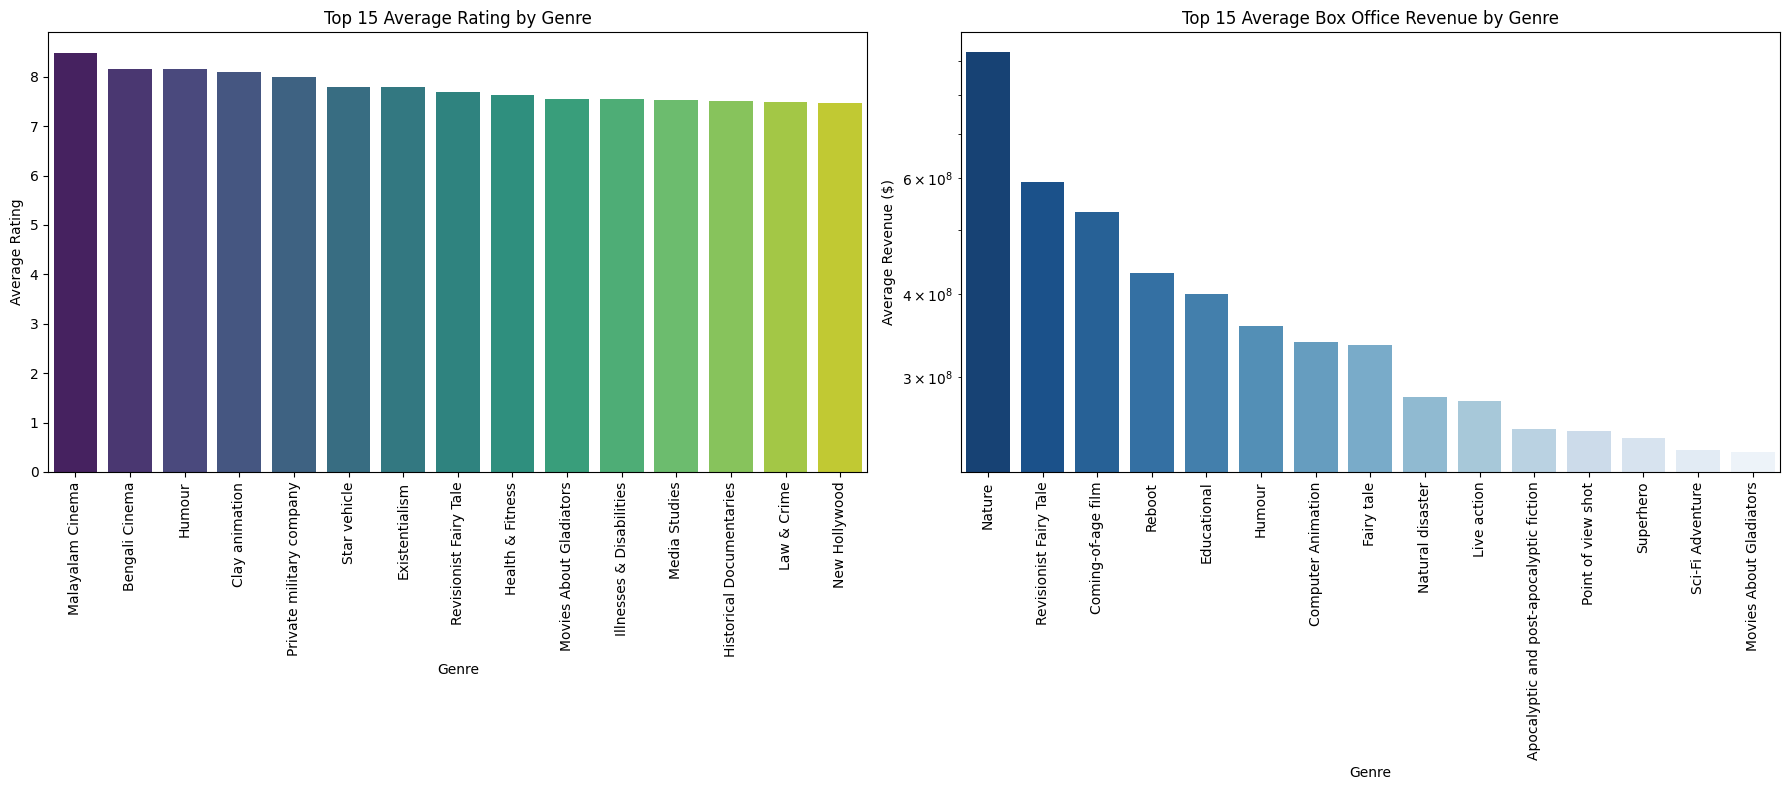

In [15]:
md_Genres = pd.merge(md_Genres,movie_data[['Wikipedia_movie_ID','averageRating','numVotes']],on='Wikipedia_movie_ID')

genre_stats = md_Genres.groupby('Genres').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
})

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Average IMDb rating by Genre (Left plot)
genre_stats = genre_stats.sort_values(by='averageRating', ascending=False)
sns.barplot(x=genre_stats.head(15).index, y=genre_stats.head(15)['averageRating'], ax=axs[0], palette='viridis', hue=genre_stats.head(15).index)
axs[0].set_title("Top 15 Average Rating by Genre")
axs[0].set_xlabel("Genre")
axs[0].set_ylabel("Average Rating")
axs[0].tick_params(axis='x', rotation=90)  

# Average box office revenue by Genre (Right plot)
genre_stats = genre_stats.sort_values(by='Movie_box_office_revenue', ascending=False)
sns.barplot(x=genre_stats.head(15).index, y=genre_stats.head(15)['Movie_box_office_revenue'], ax=axs[1], palette='Blues_r', hue=genre_stats.head(15).index)
axs[1].set_title("Top 15 Average Box Office Revenue by Genre")
axs[1].set_xlabel("Genre")
axs[1].set_ylabel("Average Revenue ($)")
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()


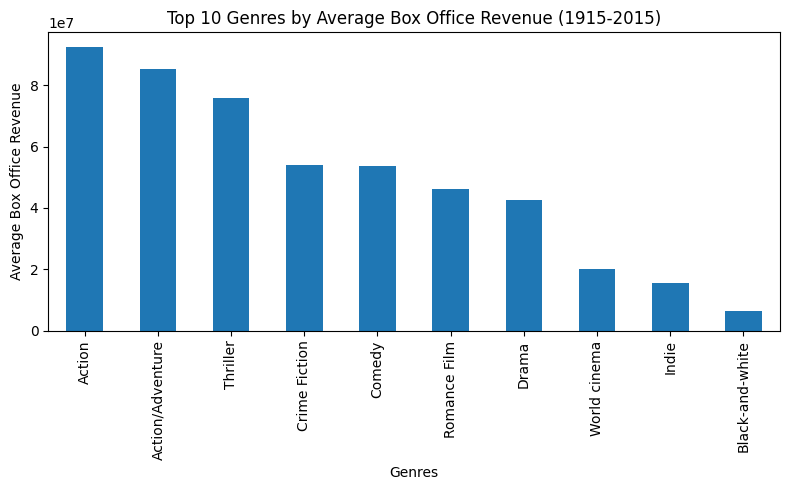

In [16]:
ax = top_n_total_revenue('Genres', md_Genres)

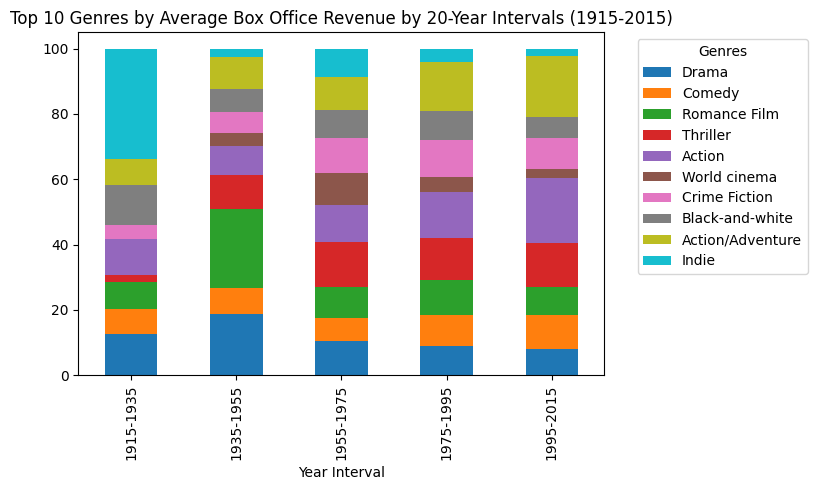

In [17]:
ax = top_n_by_interval('Genres',md_Genres, revenue=True)

## 4 Analysis per Release Season

In this section, we examine the impact of the release season on the number of movies produced and their box office revenues. This analysis provides insights into how the strategic timing, like holidays, of a movie's release can affect its performance at the box office.

In [18]:
with open(pickle_folder + 'movies_clean_with_season.p', 'rb') as f:
    movies_season = pickle.load(f)

### 4.1 Number of Movies per Release Season

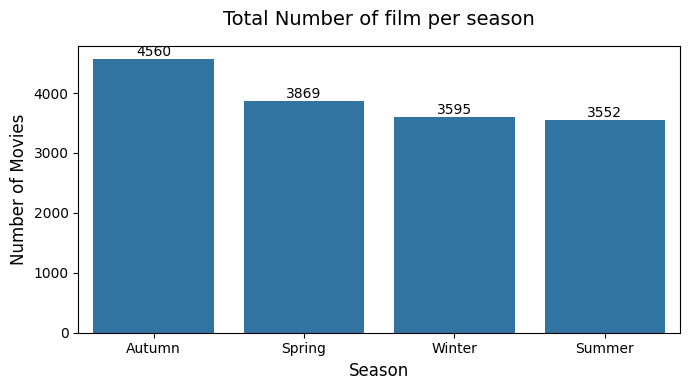

In [19]:
plt.figure(figsize=(7, 4))

yearly_counts = movies_season.value_counts('release_season')

ax = sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Total Number of film per season', fontsize=14, pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

for i, v in enumerate(yearly_counts.values):
    ax.text(i, v + 1, str(v), 
            ha='center', 
            va='bottom',
            fontsize=10)

plt.tight_layout()

plt.show()

Autumn has the highest number of film releases, followed by Spring, Winter, and finally Summer with the fewest releases. This suggests that studios may strategically concentrate releases in Autumn, as colder weather encourages more people to watch movies indoors.  This suggests that studios may strategically concentrate releases in Autumn, possibly aligning with awards season and end-of-year interest.  Conversely, the lower number of Summer releases could be due to people spending more time on outdoor activities, reducing their interest in going to the cinema.

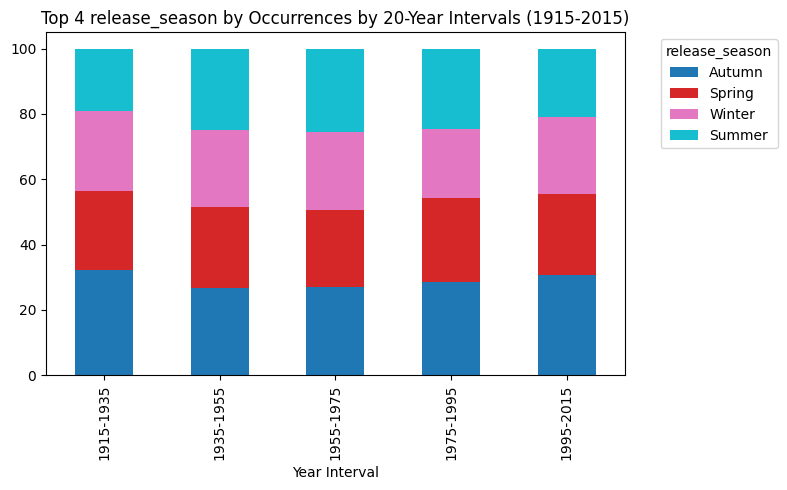

In [20]:
ax = top_n_by_interval('release_season',movies_season,n=4)

### 4.2 Box Office Revenue per Release Season

Average Box Office Revenue by Release Season:
release_season
Autumn    4.770817e+07
Winter    5.388933e+07
Spring    6.106224e+07
Summer    7.972174e+07
Name: mean, dtype: float64


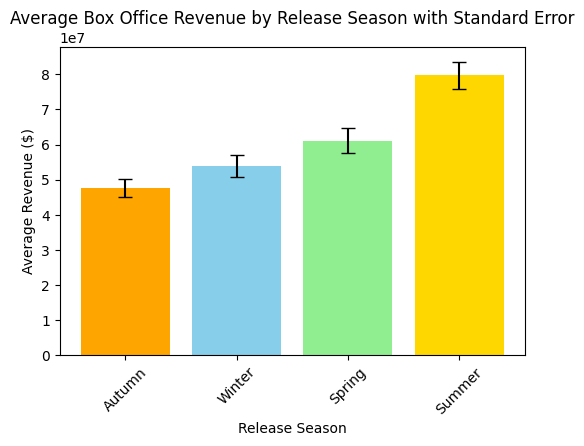

In [21]:
release_season_stats = movies_season.groupby('release_season')['Movie_box_office_revenue'].agg(['mean', 'sem']).sort_values(by='mean')
# Print the average revenues by season
print("Average Box Office Revenue by Release Season:")
print(release_season_stats['mean'])

# Plot the average revenues with standard error bars
plt.figure(figsize=(6, 4))
plt.bar(release_season_stats.index, release_season_stats['mean'], yerr=release_season_stats['sem'], color=['orange', 'skyblue', 'lightgreen', 'gold'], capsize=5)
plt.title('Average Box Office Revenue by Release Season with Standard Error')
plt.xlabel('Release Season')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45)
plt.show()

This bar chart shows the average box office revenue by release season, with Summer generating the highest revenue on average. The higher revenue in Summer may reflect the success of blockbuster films typically released during this season when audiences have more leisure time. Despite Autumn having the most releases (as seen in the previous chart), it yields the lowest average revenue per film, suggesting that high volume does not necessarily correlate with higher earnings per movie.

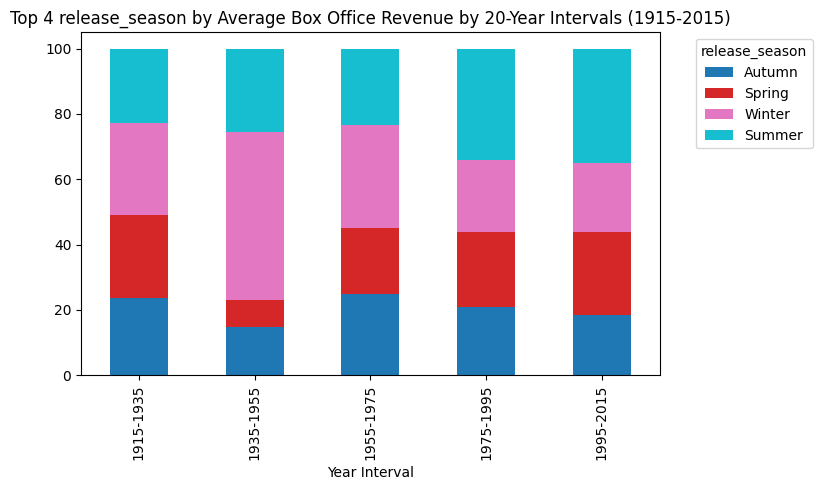

In [22]:
ax = top_n_by_interval('release_season',movies_season,n=4, revenue=True)

## 5. Analysis per Language

In [23]:
with open(pickle_folder + 'movies_languages_exploded.p', 'rb') as f:
    movies_languages = pickle.load(f)

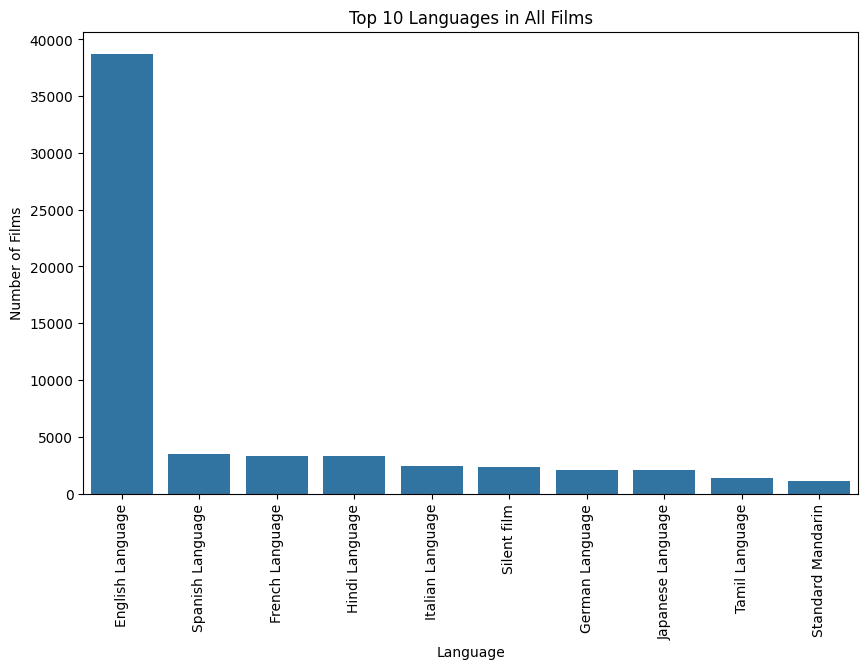

In [24]:
# top 10 languages 
top_languages = movies_languages['Languages'].value_counts().head(10)

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Top 10 Languages in All Films')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)  
plt.show()

This bar chart displays the top 10 languages in all films, with a notable dominance of English-language films, vastly outnumbering other languages. This prevalence of English reflects its global appeal and influence, as English-language films often have broader international distribution. 

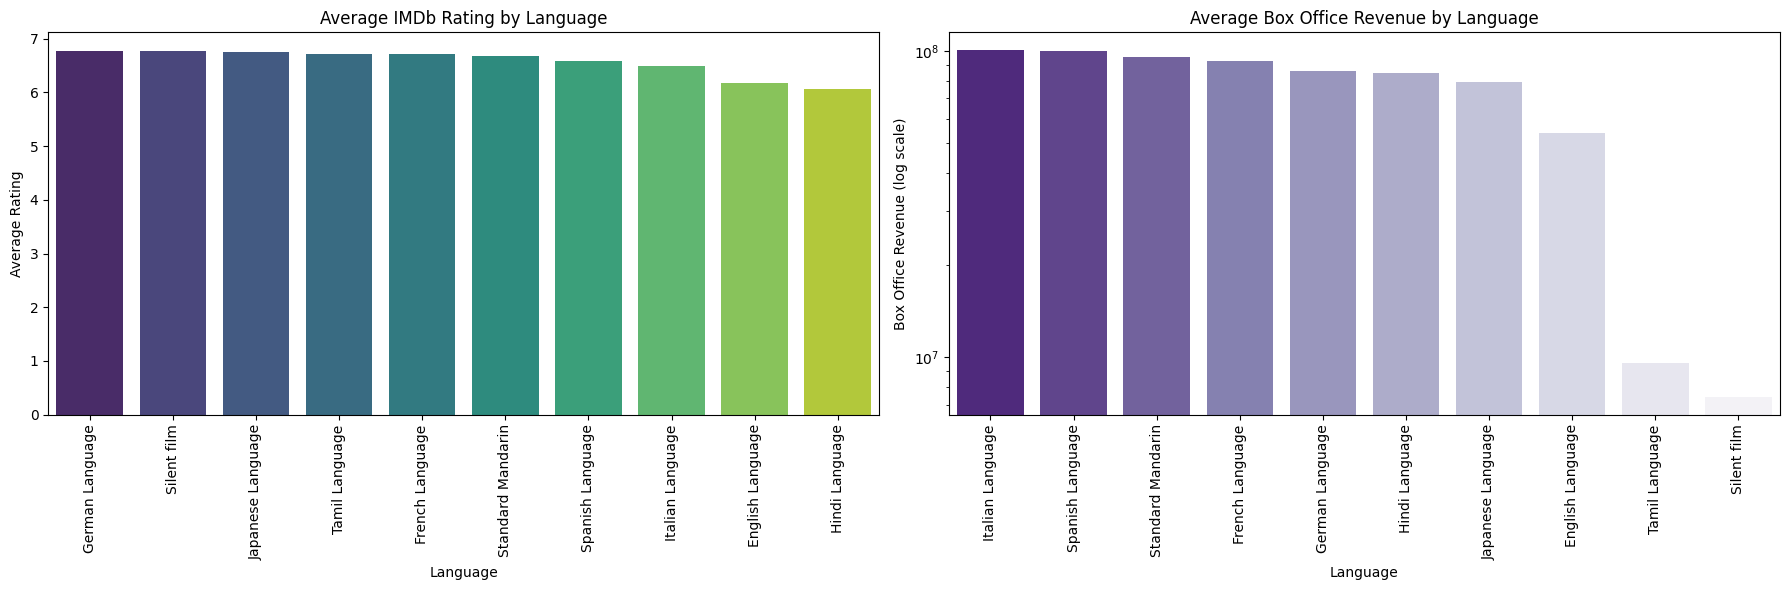

In [25]:
top_language_data = movies_languages[movies_languages['Languages'].isin(top_languages.index)]
top_language_data = pd.merge(top_language_data,movie_data[['Wikipedia_movie_ID','averageRating','numVotes']],on='Wikipedia_movie_ID')


language_success = top_language_data.groupby('Languages').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
})

language_success_rating = language_success.sort_values(by='averageRating', ascending=False)
language_success_revenue = language_success.sort_values(by='Movie_box_office_revenue', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Average imdb rating by Language
sns.barplot(x=language_success_rating.index, y=language_success_rating['averageRating'], ax=axs[0], palette='viridis', hue=language_success_rating.index)
axs[0].set_title('Average IMDb Rating by Language')
axs[0].set_xlabel('Language')
axs[0].set_ylabel('Average Rating')
axs[0].tick_params(axis='x', rotation=90)  

# Average box office revenue by Language
sns.barplot(x=language_success_revenue.index, y=language_success_revenue['Movie_box_office_revenue'], ax=axs[1], palette='Purples_r', hue=language_success_revenue.index)
axs[1].set_title('Average Box Office Revenue by Language')
axs[1].set_xlabel('Language')
axs[1].set_ylabel('Box Office Revenue (log scale)')
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

The charts show that, while average IMDb ratings are fairly consistent across languages, with Hindi, Italian, and Tamil films slightly leading, average box office revenue varies more widely. Spanish, Italian, and German films top the revenue chart on average, suggesting strong regional or niche appeal that yields high earnings, whereas English-language films, despite their prevalence, have lower average revenue per film. This contrast indicates that although English dominates in quantity, certain non-English language films may achieve significant financial success, possibly due to concentrated popularity within their primary markets or through distinct international appeal. Silent films, unsurprisingly, have the lowest average revenue, reflecting limited modern demand.

## 6. Analysis of the Age of Actors

### 6.1 Number of Actors per Age

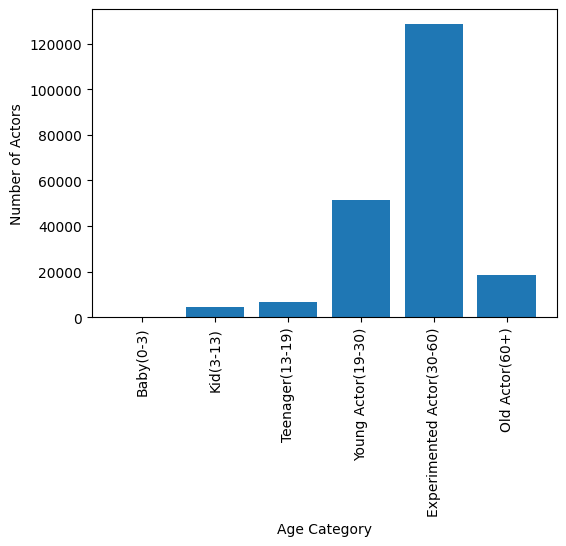

In [26]:
cd_age = character_data.copy()
order=['Baby(0-3)', 'Kid(3-13)', 'Teenager(13-19)', 'Young Actor(19-30)', 'Experimented Actor(30-60)', 'Old Actor(60+)']
number_of_actors = cd_age['Age_Interval'].value_counts()[order]

plt.figure(figsize=(6, 4))
plt.bar(number_of_actors.index, number_of_actors.values)
plt.xlabel('Age Category')
plt.ylabel('Number of Actors')
plt.xticks(rotation=90)
plt.show()

This bar chart displays the distribution of actors across different age categories, with "Experienced Actor" (ages 30-60) being the most represented group, followed by "Young Actor" (ages 19-30). The significant number of actors in these two categories suggests a preference for casting adults, especially those within the experienced range, likely due to their skill level and appeal to a wide audience. In contrast, younger age groups (like Kids and Teenagers) and older actors (60+) are much less represented, possibly reflecting fewer roles written for these age demographics, because of the restrictiveness of their actions.

### 6.2 Box Office Revenue and Average Rating per Age

Text(0.5, 1.0, 'Contribution of each Age category to the Box office')

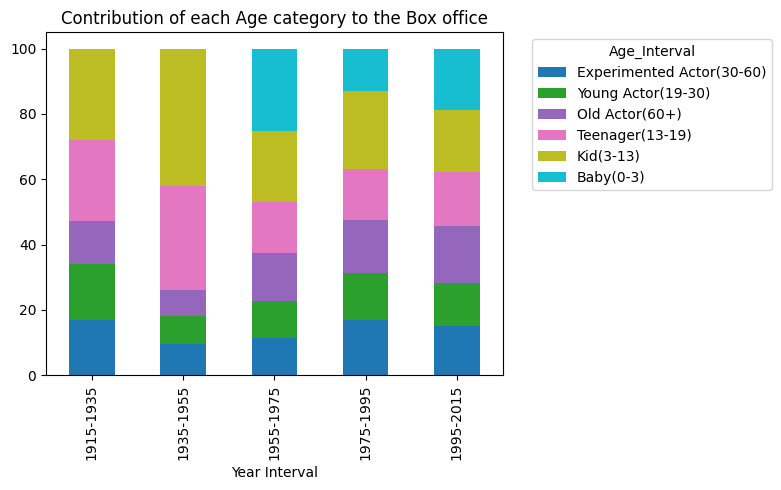

In [27]:
ax = top_n_by_interval('Age_Interval',cd_age,n=6, revenue=True)
ax.set_title("Contribution of each Age category to the Box office")

"Experienced Actors" (ages 30-60) have consistently contributed a substantial portion to box office earnings over time, emphasizing their long-standing appeal and importance in the industry. While younger actors (19-30) have also maintained a steady presence, the share of child actors (0-13) has increased significantly in more recent years (1995-2015), indicating a growing trend in family-oriented films or films involving young casts. The representation of older actors (60+) has remained fairly consistent but less prominent, suggesting that lead roles may still be less commonly written for this age group.

Text(0.5, 1.0, 'Contribution of each Age category to the Box office')

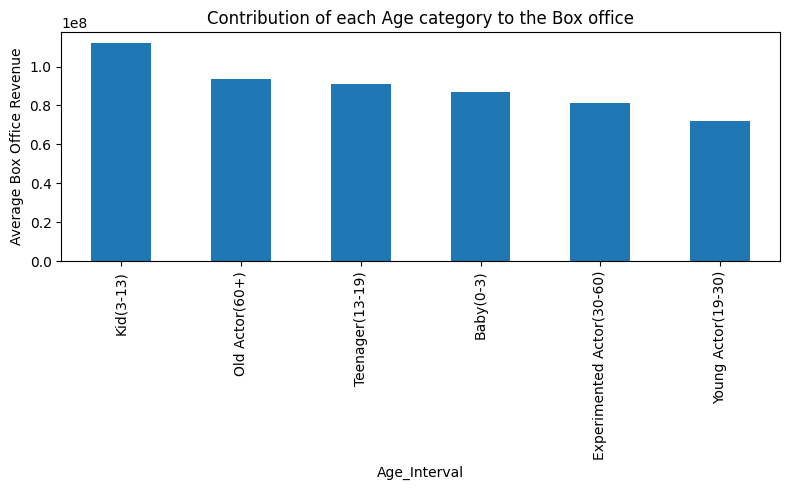

In [28]:
ax = top_n_total_revenue('Age_Interval',cd_age,n=6)
ax.set_title("Contribution of each Age category to the Box office")

The high average revenue for child actors might indicate the popularity of family and animated movies featuring young characters, which often perform well at the box office. In contrast, "Young Actors" (19-30) and "Experienced Actors" (30-60) contribute comparatively less on average, suggesting that while these age groups are widely represented, their box office impact per film may be lower than younger and older age categories.

Text(0.5, 1.0, 'Average IMDb Rating per Age category')

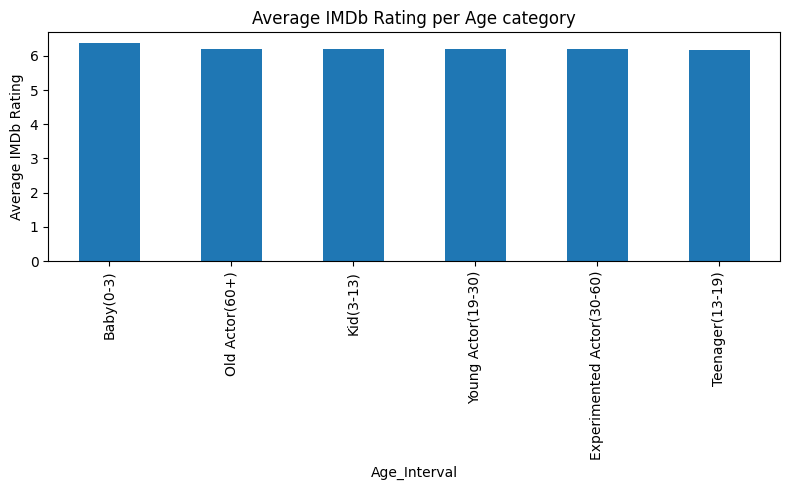

In [29]:
ax = top_n_average_rating('Age_Interval',cd_age,n=6)
ax.set_title("Average IMDb Rating per Age category")

## 7. Analysis of the Gender of Actors

### 7.1 Number of Actors per Gender

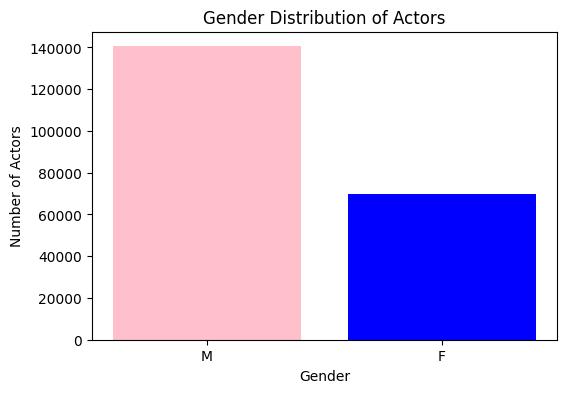

In [30]:
cd_gender = character_data.copy()
number_of_actors = cd_gender['Actor_gender'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(number_of_actors.index, number_of_actors.values, color=['pink','blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Actors')
plt.title('Gender Distribution of Actors')
plt.show()

### 7.2 Box Office Revenue and Average Rating per Gender

Text(0.5, 1.0, 'Contribution of each Gender to the Box office Revenue')

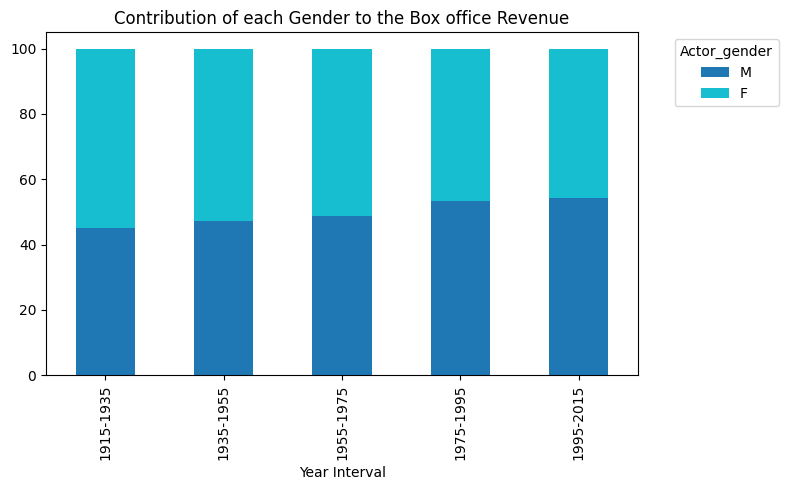

In [31]:
ax = top_n_by_interval('Actor_gender',cd_age,n=2, revenue=True)
ax.set_title("Contribution of each Gender to the Box office Revenue")

Male actors consistently contribute around half of the box office revenue in each period, with a steady presence over time. Female actors' contribution also remains stable, accounting for roughly the other half, despite the lower number of female actors overall (as shown in the previous chart). This suggests that, while male actors are more numerous in the industry, female actors still have a substantial impact on box office earnings, indicating a potentially high revenue-per-actor ratio for females in comparison to their male counterparts.

Text(0.5, 1.0, 'Contribution of each Gender to the Box office Revenue')

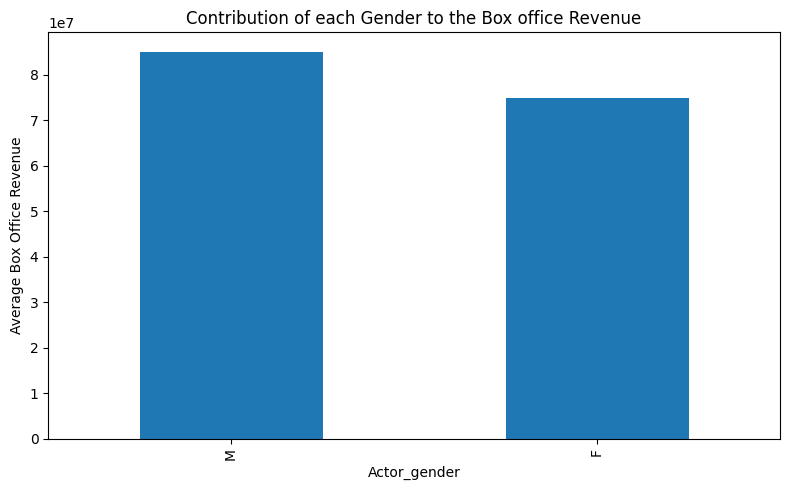

In [32]:
ax = top_n_total_revenue('Actor_gender',cd_age,n=2)
ax.set_title("Contribution of each Gender to the Box office Revenue")

Films with male leads show slightly higher average revenue than those with female leads, though the difference is not substantial. This close revenue comparison suggests that, while male actors may be more numerous in the industry, female-led films are comparably successful on a per-film basis, indicating strong audience interest and market viability for movies led by female actors.

Text(0.5, 1.0, 'Average IMDb Rating by Gender')

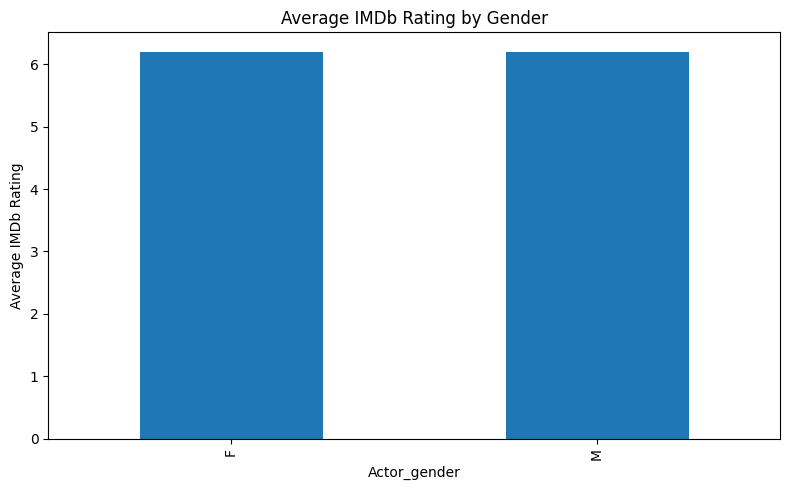

In [33]:
ax = top_n_average_rating('Actor_gender',cd_age,n=2)
ax.set_title("Average IMDb Rating by Gender")

This similarity suggests that films led by either gender are equally well-received by audiences, indicating no significant preference in viewer ratings based on the lead actor's gender. This parity in ratings highlights that audience appreciation for films is consistent across genders, pointing towards quality and appeal as more influential factors than the gender of the lead.